In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("./DataSets/TShirt_size.csv")
df.head()

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M


In [3]:
d = np.sqrt((df["Height (in cms)"] - 161)**2 + (df["Weight (in kgs)"] - 61)**2)
df["Eucledian_distance"] = d
df1 = df.sort_values(by="Eucledian_distance")
df1.head()

,Height (in cms),Weight (in kgs),T Shirt Size,Eucledian_distance
4,160,60,M,1.414214
6,163,61,M,2.000000
3,160,59,M,2.236068
5,163,60,M,2.236068
7,160,64,L,3.162278


In [17]:
k = int(input("Enter K: "))
print("Prediction: ",str(df["T Shirt Size"][:k].mode())[5])

Enter K: 5
Prediction:  M


## Find out Eucledian Distance

In [ ]:
def Euclid(x,y,n):
    d=0
    for i in range(n):
        d = d + np.square(x[i] - y[i])
        
    return np.sqrt(d)

In [18]:
from pydataset import data

df = data("iris")
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [20]:
X = df.iloc[:,:-1]
Y = df.iloc[:,[-1]]

In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((120, 4), (30, 4), (120, 1), (30, 1))

In [29]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
cls = KNeighborsClassifier(n_neighbors=5,metric="minkowski")

cls.fit(X_train, Y_train)

y_pred = cls.predict(X_test)

In [31]:
confusion_matrix(Y_test,y_pred)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

In [32]:
cls.score(X_test,Y_test)

0.9666666666666667

In [40]:
k_list = [i for i in range(1,30,2)]
miss_class = []
for i in k_list:
    cls = KNeighborsClassifier(n_neighbors=i)

    cls.fit(X_train, Y_train)

    y_pred = cls.predict(X_test)
    cm = confusion_matrix(Y_test,y_pred)
    miss_class.append(cm.sum() - sum(np.diag(cm)))
    

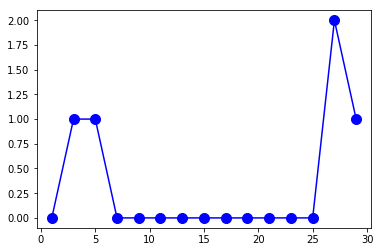

In [61]:
plt.plot(k_list,miss_class,marker="o",color="b",markersize=10)
plt.show()

## Recall is given by the relation:
** Recall = TP/TP+FN **
## Precision is given by
** Precision = TP/TP+FP

In [45]:
cm.sum()-sum(np.diag(cm))

1

In [64]:
data = pd.read_excel("./DataSets/Absenteeism_at_work.xls")
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


In [77]:
default = pd.DataFrame({"Age":[25,35,45,20,35,52,23,40,60,48,33],"Loan":[40000,60000,80000,20000,120000,18000,90000,62000,
                                                                       100000,220000,150000],"Default":["N","N","N",
                                                                                                        "N","N","N","Y","Y","Y","Y","Y"]})
default

,Age,Loan,Default
0,25,40000,N
1,35,60000,N
2,45,80000,N
3,20,20000,N
4,35,120000,N
5,52,18000,N
6,23,90000,Y
7,40,62000,Y
8,60,100000,Y
9,48,220000,Y


In [67]:
default["Age"] = (default.Age - default.Age.mean())/(default.Age.max()-default.Age.min())
default["Loan"] = (default.Loan - default.Loan.mean())/(default.Loan.max()-default.Loan.min())
default.head()

,Age,Loan,Default
0,-0.320455,-0.234023,N
1,-0.070455,-0.135014,N
2,0.179545,-0.036004,N
3,-0.445455,-0.333033,N
4,-0.070455,0.162016,N


In [72]:
d = np.sqrt((default["Age"] - 0.7)**2 + (default["Loan"] - 0.6139)**2)
default["Eucledian_distance"] = d
df1 = default.sort_values(by="Eucledian_distance")
df1.head()

,Age,Loan,Default,Eucledian_distance
9,0.254545,0.657066,Y,0.447541
8,0.554545,0.063006,Y,0.569773
2,0.179545,-0.036004,N,0.832615
10,-0.120455,0.310531,Y,0.874745
4,-0.070455,0.162016,N,0.893196


In [75]:
k = int(input("Enter K: "))
print("Prediction: ",str(df1["Default"][:k].mode())[5])


Enter K: 3
Prediction:  Y


In [76]:
default.Age.std()

0.3155982774466184

In [78]:
default["Age"] = (default.Age - default.Age.mean())/(default.Age.std())
default["Loan"] = (default.Loan - default.Loan.mean())/(default.Loan.std())
default.head()

,Age,Loan,Default
0,-1.015387,-0.790229,N
1,-0.223241,-0.455901,N
2,0.568905,-0.121574,N
3,-1.411461,-1.124557,N
4,-0.223241,0.547082,N


In [80]:
print((48 - default.Age.mean())/default.Age.std())
print((142000 - default.Loan.mean())/default.Loan.std())

48.00000000000001
142000.0


In [89]:
d = np.sqrt((default["Age"] - 0.86)**2 + (default["Loan"] - 0.96)**2)
default["Eucledian_distance"] = d
df1 = default.sort_values(by="Eucledian_distance")
df1.head()

,Age,Loan,Default,Eucledian_distance
2,0.568905,-0.121574,N,1.120062
4,-0.223241,0.547082,N,1.159273
8,1.757124,0.212754,Y,1.167565
10,-0.381670,1.048573,Y,1.244826
9,0.806549,2.218720,Y,1.259854


In [90]:
k = int(input("Enter K: "))
print("Prediction: ",str(df1["Default"][:k].mode())[5])

Enter K: 5
Prediction:  Y


In [87]:
48 -1.312081756375185e-16
#default.Age.mean()

48.0